### Equation of a Line
Let's go back to our linear equations and systems. There are many ways to define what "linear" means, but they all boil down to the same thing.

The equation $ax + b = 0$ is called *linear* because the function $f(x) = ax+b$ is a linear function. We know that there are several ways to know what one particular function means. One of them is to just write the expression for it, as we did above. Another way is to **plot** it. This is one of the most exciting parts of maths and science - when we have to fiddle around with beautiful plots (although not so beautiful in this case).

The function produces a straight line and we can see it.

How do we plot functions in general? We know that functions take many (possibly infinitely many) inputs. We can't draw all of them. We could, however, evaluate the function at some points and connect them with tiny straight lines. If the points are too many, we won't notice - the plot will look smooth.

Now, let's take a function, e.g. $y = 2x + 3$ and plot it. For this, we're going to use `numpy` arrays. This is a special type of array which has two characteristics:
* All elements in it must be of the same type
* All operations are **broadcast**: if `x = [1, 2, 3, 10]` and we write `2 * x`, we'll get `[2, 4, 6, 20]`. That is, all operations are performed at all indices. This is very powerful, easy to use and saves us A LOT of looping.

There's one more thing: it's blazingly fast because all computations are done in C, instead of Python.

First let's import `numpy`. Since the name is a bit long, a common convention is to give it an **alias**:
```python
import numpy as np
```

Import that at the top cell and don't forget to re-run it.

Next, let's create a range of values, e.g. $[-3, 5]$. There are two ways to do this. `np.arange(start, stop, step)` will give us evenly spaced numbers with a given step, while `np.linspace(start, stop, num)` will give us `num` samples. You see, one uses a fixed step, the other uses a number of points to return. When plotting functions, we usually use the latter. Let's generate, say, 1000 points (we know a straight line only needs two but we're generalizing the concept of plotting here :)).
```python
x = np.linspace(-3, 5, 1000)
```
Now, let's generate our function variable
```python
y = 2 * x + 3
```

We can print the values if we like but we're more interested in plotting them. To do this, first let's import a plotting library. `matplotlib` is the most commnly used one and we usually give it an alias as well.
```python
import matplotlib.pyplot as plt
```

Now, let's plot the values. To do this, we just call the `plot()` function. Notice that the top-most part of this notebook contains a "magic string": `%matplotlib inline`. This hints Jupyter to display all plots inside the notebook. However, it's a good practice to call `show()` after our plot is ready.
```python
plt.plot(x, y)
plt.show()
```

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.transforms import ScaledTranslation

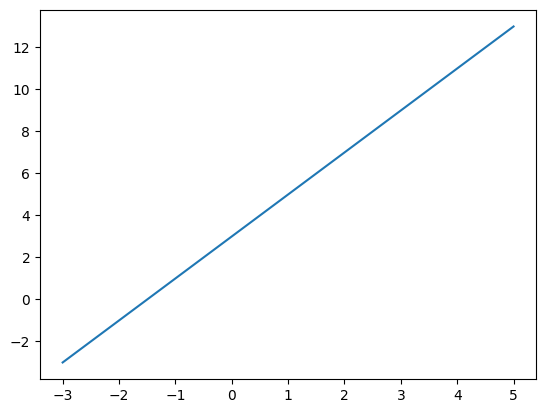

In [4]:
# Define variables
x = np.linspace(-3, 5, 2)
y = 2 * x + 3
plt.plot(x, y)
plt.show()

It doesn't look too bad bit we can do much better. See how the axes don't look like they should? Let's move them to zero. This can be done using the "spines" of the plot (i.e. the borders).

All `matplotlib` figures can have many plots (subfigures) inside them. That's why when performing an operation, we have to specify a target figure. There is a default one and we can get it by using `plt.gca()`. We usually call it `ax` for "axis".
Let's save it in a variable (in order to prevent multiple calculations and to make code prettier). Let's now move the bottom and left spines to the origin $(0, 0)$ and hide the top and right one.
```python
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
```

**Note:** All plot manipulations **MUST** be done before calling `plt.show()`. It's up to you whether they should be before or after the function you're plotting.

This should look better now. We can, of course, do much better (e.g. remove the double 0 at the origin and replace it with a single one).

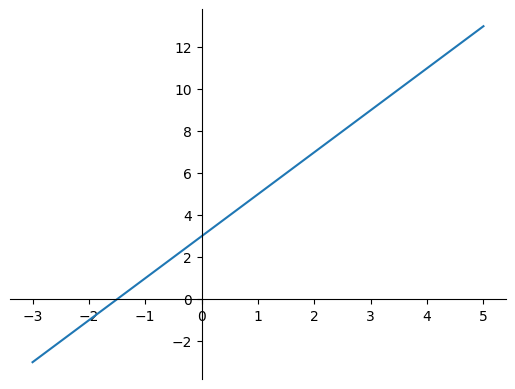

In [5]:
# Define variables
x = np.linspace(-3, 5, 2)
y = 2 * x + 3

# Stylize the plot.
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.plot(x, y)
plt.show()

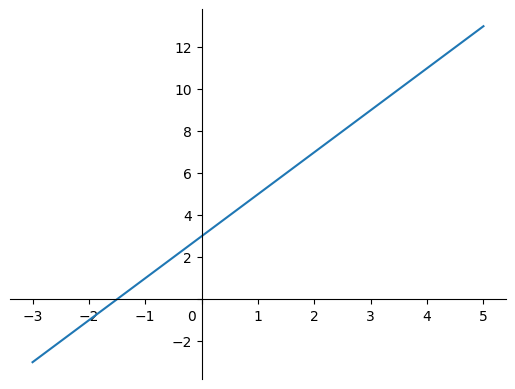

In [6]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Hide one of the zeroes in the center.
class HideZeroFormatter(ScalarFormatter):
    """ Display an empty label if value == 0."""
    def __call__(self, value, pos=None):
        return '' if value == 0 else ScalarFormatter.__call__(self, value, pos)

def move_zero_tick_label(axis):
    labels = axis.get_majorticklabels()
    for label in labels:
        if label.get_text() == "0":
            label.set_transform(label.get_transform() + ScaledTranslation(-0.1, 0, axis.figure.dpi_scale_trans))

# Hide the zero for Y axis and move the zero for X axis.
ax.yaxis.set_major_formatter(HideZeroFormatter())

# Draw the plot.
plt.plot(x, y)
# Add transformation (move zero label)
move_zero_tick_label(ax.xaxis)
# Show the plot
plt.show()